# Advance Statistics with Projects

## Lecture 04  Overview

This notebook covers fundamental concepts in statistics and their practical implementation in Python. We will explore:

1. What statistics can do for us
2. Types of data and their characteristics
3. Converting categorical data to numerical representations
4. Applications in machine learning and deep learning
5. Introduction to the statsmodels library

## 1. What Statistics Can Do?

Statistics is a branch of mathematics that helps us:

**Describe and Summarize Data**
- Calculate measures like mean, median, mode
- Understand the spread and distribution of data
- Identify patterns and trends

**Make Informed Decisions**
- Test hypotheses about populations
- Compare different groups or treatments
- Assess relationships between variables

**Predict Future Outcomes**
- Build models to forecast trends
- Estimate probabilities of events
- Guide business and research decisions

**Handle Uncertainty**
- Quantify the confidence in our conclusions
- Account for randomness and variability
- Identify significant versus random patterns

**Real-World Applications**
- Medical research: testing drug effectiveness
- Business: customer behavior analysis
- Finance: risk assessment and portfolio optimization
- Machine Learning: model evaluation and feature selection

# What Can Statistics Do?

**Statistics**  is not just about calculating averages; it is the *"science of learning from data."*

### Key Concepts to Cover:

* **Describe the Past (Descriptive Statistics):** It summarizes complicated data into simple numbers.
    * *Example:* "The average salary of a Data Scientist in Pakistan is X." This summarizes thousands of individual salaries into one number we can understand.
* **Infer the Truth (Inferential Statistics):** It allows us to make conclusions about a huge population based on a small sample.
    * *Example:* "We surveyed 1,000 voters and predict that Candidate A will win the election." You didn't ask everyone, but stats helps you guess the result with confidence.
* **Predict the Future (Predictive Analytics):** It uses patterns from the past to forecast what will happen next.
    * *Example:* "Based on sales data from the last 5 years, we predict sales will drop in February."

## 2. Types of Data

Understanding data types is crucial because it determines what statistical methods and visualizations we can use.

### Main Categories:

**A. Numerical Data (Quantitative)**
Data that represents quantities and can be measured or counted.

**B. Categorical Data (Qualitative)**
Data that represents categories or groups and cannot be measured numerically in a meaningful way.

### 2.1 Numerical Data (Quantitative Data)

Numerical data can be further divided into two subtypes:

#### a) Continuous Data
- Can take any value within a range
- Can be measured with decimals
- Examples:
  - Height: 170.5 cm, 165.2 cm
  - Weight: 68.7 kg, 72.3 kg
  - Temperature: 36.6°C, 37.2°C
  - Time: 2.5 hours, 3.75 seconds
  - Income: $45,250.50

#### b) Discrete Data
- Can only take specific values (usually whole numbers)
- Result from counting
- Cannot have fractional values
- Examples:
  - Number of students: 25, 30, 42
  - Number of cars: 3, 5, 10
  - Exam scores: 85, 92, 78 (if graded as whole numbers)
  - Number of children: 0, 1, 2, 3
  - Page views: 150, 200, 1500

### 2.2 Categorical Data (Qualitative Data)

Categorical data can be divided into two subtypes:

#### a) Nominal Data
- Categories with no inherent order or ranking
- Categories are just names or labels
- Examples:
  - Gender: Male, Female, Other
  - Color: Red, Blue, Green, Yellow
  - Country: Pakistan, USA, China, India
  - Blood Type: A, B, AB, O
  - Marital Status: Single, Married, Divorced
  - Vehicle Type: Car, Bike, Bus, Truck

#### b) Ordinal Data
- Categories with a meaningful order or ranking
- The distance between categories is not necessarily equal
- Examples:
  - Education Level: High School < Bachelor < Master < PhD
  - Customer Satisfaction: Very Unsatisfied < Unsatisfied < Neutral < Satisfied < Very Satisfied
  - Movie Rating: 1 star < 2 stars < 3 stars < 4 stars < 5 stars
  - Economic Status: Low Income < Middle Income < High Income
  - T-shirt Size: XS < S < M < L < XL < XXL
  - Grade: F < D < C < B < A

In [ ]:
# Let's create examples of different data types in Python

import pandas as pd
import numpy as np

# Creating a sample dataset with different data types
data = {
    # Continuous numerical data
    'height_cm': [170.5, 165.2, 180.1, 175.8, 168.3],
    'weight_kg': [68.7, 72.3, 85.1, 79.5, 71.2],
    'temperature_celsius': [36.6, 37.2, 36.8, 37.0, 36.5],

    # Discrete numerical data
    'num_children': [0, 2, 1, 3, 2],
    'exam_score': [85, 92, 78, 88, 95],

    # Nominal categorical data
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'blood_type': ['A', 'B', 'O', 'AB', 'A'],
    'country': ['Pakistan', 'USA', 'China', 'India', 'Pakistan'],

    # Ordinal categorical data
    'education': ['Bachelor', 'Master', 'PhD', 'High School', 'Bachelor'],
    'satisfaction': ['Satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
}

# Create DataFrame
# pd.DataFrame() creates a tabular data structure from a dictionary
# Each key becomes a column name, and values become the column data
df = pd.DataFrame(data)

print("Sample Dataset:")
print(df)
print("\n" + "="*80 + "\n")

# Check data types as Python sees them
# df.dtypes shows the data type of each column
# This helps us understand how pandas interprets our data
print("Data Types in Python/Pandas:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Display basic statistics for numerical columns
# df.describe() provides summary statistics (count, mean, std, min, quartiles, max)
# Only works on numerical columns by default
# This is useful to quickly understand the distribution of numerical data
print("Summary Statistics for Numerical Data:")
print(df.describe())

Sample Dataset:
   height_cm  weight_kg  temperature_celsius  num_children  exam_score  \
0      170.5       68.7                 36.6             0          85   
1      165.2       72.3                 37.2             2          92   
2      180.1       85.1                 36.8             1          78   
3      175.8       79.5                 37.0             3          88   
4      168.3       71.2                 36.5             2          95   

   gender blood_type   country    education    satisfaction  
0    Male          A  Pakistan     Bachelor       Satisfied  
1  Female          B       USA       Master  Very Satisfied  
2    Male          O     China          PhD         Neutral  
3  Female         AB     India  High School       Satisfied  
4    Male          A  Pakistan     Bachelor  Very Satisfied  


Data Types in Python/Pandas:
height_cm              float64
weight_kg              float64
temperature_celsius    float64
num_children             int64
exam_score  

## 3. Converting Categorical Data to Numerical Format

### Why Do We Need to Convert Categorical Data?

Machine learning and deep learning algorithms work with mathematical operations, which require numerical input. Categorical data (like "Red", "Blue", "Green") cannot be directly used in calculations.

### Common Encoding Techniques:

#### 3.1 Label Encoding
- Assigns a unique integer to each category
- Best for: Ordinal data where order matters
- Warning: Creates artificial ordering for nominal data
- Example: Low=0, Medium=1, High=2

#### 3.2 One-Hot Encoding
- Creates binary columns for each category
- Best for: Nominal data where order does not matter
- Avoids creating artificial relationships between categories
- Example: Color Red becomes [1,0,0], Blue becomes [0,1,0], Green becomes [0,0,1]
| Original Color | Red Column | Blue Column | Green Column |
| :--- | :---: | :---: | :---: |
| **Red** | 1 | 0 | 0 |
| **Blue** | 0 | 1 | 0 |
| **Green** | 0 | 0 | 1 |
#### 3.3 Ordinal Encoding
- Similar to label encoding but with explicit ordering
- Best for: Ordinal data with known order
- We can specify the order ourselves
- Example: Small=1, Medium=2, Large=3

### 3.1 Label Encoding Example

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset with categorical data
colors = ['Red', 'Blue', 'Green', 'Red', 'Yellow', 'Blue', 'Green']

# Initialize the LabelEncoder
# LabelEncoder is a class from sklearn that converts categorical labels to numbers
label_encoder = LabelEncoder()

# Fit and transform the data
# fit() learns all unique categories in the data
# transform() converts categories to numbers
# fit_transform() does both in one step
colors_encoded = label_encoder.fit_transform(colors)

print("Original Data:")
print(colors)
print("\nEncoded Data:")
print(colors_encoded)
print("\nMapping:")
# classes_ attribute shows the mapping of numbers to original categories
# The index position corresponds to the encoded number
for i, category in enumerate(label_encoder.classes_):
    print(f"{category} -> {i}")

print("\n" + "="*80 + "\n")

# Demonstrating inverse transform
# inverse_transform() converts numbers back to original categories
# Useful for interpreting model predictions
decoded_colors = label_encoder.inverse_transform(colors_encoded)
print("Decoded back to original:")
print(decoded_colors)

Original Data:
['Red', 'Blue', 'Green', 'Red', 'Yellow', 'Blue', 'Green']

Encoded Data:
[2 0 1 2 3 0 1]

Mapping:
Blue -> 0
Green -> 1
Red -> 2
Yellow -> 3


Decoded back to original:
['Red' 'Blue' 'Green' 'Red' 'Yellow' 'Blue' 'Green']


### 3.2 One-Hot Encoding Example

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Sample data: different vehicle types
vehicles = np.array(['Car', 'Bike', 'Bus', 'Car', 'Bike', 'Truck']).reshape(-1, 1)
# reshape(-1, 1) converts 1D array to 2D array with one column
# sklearn requires 2D input: -1 means "calculate this dimension automatically"
# 1 means we want 1 column

print("Original Data Shape:", vehicles.shape)
print("Original Data:")
print(vehicles.flatten())  # flatten() converts back to 1D for display
print("\n" + "="*80 + "\n")

# Initialize OneHotEncoder
# sparse_output=False returns a regular array instead of sparse matrix
# Sparse matrices save memory but are harder to read
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform
vehicles_encoded = onehot_encoder.fit_transform(vehicles)

print("One-Hot Encoded Data:")
print("Shape:", vehicles_encoded.shape)  # Shows (samples, categories)
print(vehicles_encoded)
print("\nColumn Names (Categories):")
# get_feature_names_out() returns the name for each column
# Each column represents one category
print(onehot_encoder.get_feature_names_out())

# Create a more readable DataFrame
vehicles_df = pd.DataFrame(
    vehicles_encoded,
    columns=onehot_encoder.get_feature_names_out()
)
vehicles_df['Original'] = vehicles.flatten()

print("\nReadable Format:")
print(vehicles_df)

Original Data Shape: (6, 1)
Original Data:
['Car' 'Bike' 'Bus' 'Car' 'Bike' 'Truck']


One-Hot Encoded Data:
Shape: (6, 4)
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

Column Names (Categories):
['x0_Bike' 'x0_Bus' 'x0_Car' 'x0_Truck']

Readable Format:
   x0_Bike  x0_Bus  x0_Car  x0_Truck Original
0      0.0     0.0     1.0       0.0      Car
1      1.0     0.0     0.0       0.0     Bike
2      0.0     1.0     0.0       0.0      Bus
3      0.0     0.0     1.0       0.0      Car
4      1.0     0.0     0.0       0.0     Bike
5      0.0     0.0     0.0       1.0    Truck


### 3.3 Ordinal Encoding Example

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sample data: education levels with clear ordering
education_data = np.array([
    ['High School'],
    ['Bachelor'],
    ['Master'],
    ['PhD'],
    ['High School'],
    ['Bachelor'],
    ['Master']
])

print("Original Education Data:")
print(education_data.flatten())
print("\n" + "="*80 + "\n")

# Define the order explicitly
# categories parameter specifies the order for each feature
# This ensures the encoding respects the natural ordering
ordinal_encoder = OrdinalEncoder(
    categories=[['High School', 'Bachelor', 'Master', 'PhD']]
)

# Fit and transform
education_encoded = ordinal_encoder.fit_transform(education_data)

print("Ordinally Encoded Data:")
print(education_encoded.flatten())
print("\nMapping:")
for i, level in enumerate(ordinal_encoder.categories_[0]):
    print(f"{level} -> {i}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Original': education_data.flatten(),
    'Encoded': education_encoded.flatten()
})
print("\nComparison:")
print(comparison_df)

Original Education Data:
['High School' 'Bachelor' 'Master' 'PhD' 'High School' 'Bachelor' 'Master']


Ordinally Encoded Data:
[0. 1. 2. 3. 0. 1. 2.]

Mapping:
High School -> 0
Bachelor -> 1
Master -> 2
PhD -> 3

Comparison:
      Original  Encoded
0  High School      0.0
1     Bachelor      1.0
2       Master      2.0
3          PhD      3.0
4  High School      0.0
5     Bachelor      1.0
6       Master      2.0


### 3.4 Pandas Built-in Encoding Methods

In [ ]:
# Pandas provides convenient methods for encoding

# Sample DataFrame
df_example = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Yellow'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium'],
    'Price': [10, 20, 30, 15, 25]
})

print("Original DataFrame:")
print(df_example)
print("\n" + "="*80 + "\n")

# Method 1: Using pd.get_dummies() for One-Hot Encoding
# pd.get_dummies() automatically one-hot encodes all object/categorical columns
# drop_first=True removes one column per category to avoid multicollinearity
# This is important for regression models to prevent redundancy
df_dummies = pd.get_dummies(df_example, drop_first=True)

print("One-Hot Encoded using pd.get_dummies():")
print(df_dummies)
print("\n" + "="*80 + "\n")

# Method 2: Using .map() for custom encoding
# .map() applies a dictionary mapping to transform values
# Useful when you want complete control over the encoding
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df_example['Size_Encoded'] = df_example['Size'].map(size_mapping)

print("Custom Ordinal Encoding using .map():")
print(df_example)
print("\n" + "="*80 + "\n")

# Method 3: Using Categorical dtype for ordinal data
# pd.Categorical() creates an ordered categorical variable
# ordered=True indicates this is ordinal data
# .cat.codes extracts the numeric codes
df_example['Size_Cat'] = pd.Categorical(
    df_example['Size'],
    categories=['Small', 'Medium', 'Large'],
    ordered=True
)
df_example['Size_Cat_Code'] = df_example['Size_Cat'].cat.codes

print("Using Pandas Categorical:")
print(df_example[['Size', 'Size_Cat', 'Size_Cat_Code']])

Original DataFrame:
    Color    Size  Price
0     Red   Small     10
1    Blue  Medium     20
2   Green   Large     30
3     Red   Small     15
4  Yellow  Medium     25


One-Hot Encoded using pd.get_dummies():
   Price  Color_Green  Color_Red  Color_Yellow  Size_Medium  Size_Small
0     10        False       True         False        False        True
1     20        False      False         False         True       False
2     30         True      False         False        False       False
3     15        False       True         False        False        True
4     25        False      False          True         True       False


Custom Ordinal Encoding using .map():
    Color    Size  Price  Size_Encoded
0     Red   Small     10             1
1    Blue  Medium     20             2
2   Green   Large     30             3
3     Red   Small     15             1
4  Yellow  Medium     25             2


Using Pandas Categorical:
     Size Size_Cat  Size_Cat_Code
0   Small    Small  

## 4. Application in Machine Learning and Deep Learning

### Why Encoding Matters for ML/DL:

**For Traditional Machine Learning:**
- Algorithms like Linear Regression, Decision Trees, SVM need numerical input
- One-Hot encoding prevents the model from assuming ordinal relationships in nominal data
- Ordinal encoding preserves meaningful order in ranked categories

**For Deep Learning:**
- Neural networks perform mathematical operations (matrix multiplications)
- Embedding layers can learn representations from categorical data
- One-hot encoding is often used as input to embedding layers

### Best Practices:
- Use One-Hot Encoding for nominal data (no natural order)
- Use Ordinal Encoding for ordinal data (has natural order)
- Consider embedding layers for high-cardinality categorical features
- Always encode training and test data consistently

In [ ]:
# Practical example: Preparing data for machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a sample dataset for prediction
ml_data = pd.DataFrame({
    'age': [25, 35, 45, 23, 37, 48, 29, 33, 41, 27],
    'income_level': ['Low', 'Medium', 'High', 'Low', 'Medium',
                     'High', 'Low', 'Medium', 'High', 'Medium'],
    'education': ['Bachelor', 'Master', 'PhD', 'High School', 'Bachelor',
                  'PhD', 'Bachelor', 'Master', 'PhD', 'Master'],
    'purchased': [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]  # Target variable
})

print("Original Dataset:")
print(ml_data)
print("\n" + "="*80 + "\n")

# Step 1: Encode ordinal features (income_level)
# We use ordinal encoding because income levels have a natural order
income_encoder = OrdinalEncoder(
    categories=[['Low', 'Medium', 'High']]
)
ml_data['income_encoded'] = income_encoder.fit_transform(
    ml_data[['income_level']]
)

# Step 2: Encode nominal features (education)
# We use one-hot encoding even though education has order
# This is to demonstrate - in practice, you might use ordinal for education
education_encoded = pd.get_dummies(
    ml_data['education'],
    prefix='edu',  # prefix adds 'edu_' before each category name
    drop_first=True  # drop first category to avoid multicollinearity
)

# Step 3: Combine all features
# We select numerical and encoded features for our model
X = pd.concat([
    ml_data[['age', 'income_encoded']],
    education_encoded
], axis=1)  # axis=1 means concatenate columns (horizontally)

# Target variable
y = ml_data['purchased']

print("Prepared Features (X):")
print(X)
print("\nTarget Variable (y):")
print(y.values)
print("\n" + "="*80 + "\n")

# Step 4: Split data into training and testing sets
# train_test_split() randomly divides data into train and test sets
# test_size=0.3 means 30% of data goes to test set, 70% to training
# random_state=42 ensures reproducibility (same split every time)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print("\n" + "="*80 + "\n")

# Step 5: Train a simple model
# LogisticRegression is a classification algorithm
# Despite the name, it is used for classification, not regression
# max_iter=1000 sets maximum iterations for convergence
# random_state=42 ensures reproducibility
model = LogisticRegression(max_iter=1000, random_state=42)

# fit() trains the model on training data
# It learns the relationship between features (X_train) and target (y_train)
model.fit(X_train, y_train)

# Step 6: Make predictions
# predict() uses the trained model to make predictions on test data
y_pred = model.predict(X_test)

print("Predictions vs Actual:")
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison)
print("\n" + "="*80 + "\n")

# Step 7: Evaluate the model
# accuracy_score() calculates the percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nDetailed Classification Report:")
# classification_report() provides precision, recall, and f1-score for each class
# These metrics help us understand model performance in detail
print(classification_report(y_test, y_pred))

print("\n" + "="*80 + "\n")
print("Key Takeaway: The model successfully learned from encoded categorical data!")

Original Dataset:
   age income_level    education  purchased
0   25          Low     Bachelor          0
1   35       Medium       Master          1
2   45         High          PhD          1
3   23          Low  High School          0
4   37       Medium     Bachelor          1
5   48         High          PhD          1
6   29          Low     Bachelor          0
7   33       Medium       Master          1
8   41         High          PhD          1
9   27       Medium       Master          1


Prepared Features (X):
   age  income_encoded  edu_High School  edu_Master  edu_PhD
0   25             0.0            False       False    False
1   35             1.0            False        True    False
2   45             2.0            False       False     True
3   23             0.0             True       False    False
4   37             1.0            False       False    False
5   48             2.0            False       False     True
6   29             0.0            False       

## 5. Introduction to Statsmodels Library

### What is Statsmodels?

Statsmodels is a Python library that provides tools for statistical modeling and econometrics. It is particularly strong in:
- Statistical tests and data exploration
- Linear regression and generalized linear models
- Time series analysis
- Statistical hypothesis testing

### Key Differences from Scikit-learn:

**Statsmodels:**
- Focuses on statistical inference and hypothesis testing
- Provides detailed statistical summaries (p-values, confidence intervals, R-squared)
- Better for understanding relationships between variables
- Commonly used in research and econometrics

**Scikit-learn:**
- Focuses on prediction and machine learning
- Emphasizes model performance metrics
- Better for building predictive models
- Commonly used in industry and data science

### What Can Statsmodels Do?

1. **Linear Regression**: Understand relationships between variables
2. **Hypothesis Testing**: Test if relationships are statistically significant
3. **Time Series Analysis**: ARIMA, SARIMA for forecasting
4. **Generalized Linear Models**: Logistic regression, Poisson regression
5. **Statistical Tests**: t-tests, chi-square tests, ANOVA

Sample Data (first 10 rows):
   Study_Hours  Exam_Score
0     4.370861   71.175777
1     9.556429   89.082556
2     7.587945   79.773540
3     6.387926   74.046187
4     2.404168   52.224061
5     2.403951   56.016582
6     1.522753   53.787816
7     8.795585   90.467952
8     6.410035   77.358232
9     7.372653   70.675412




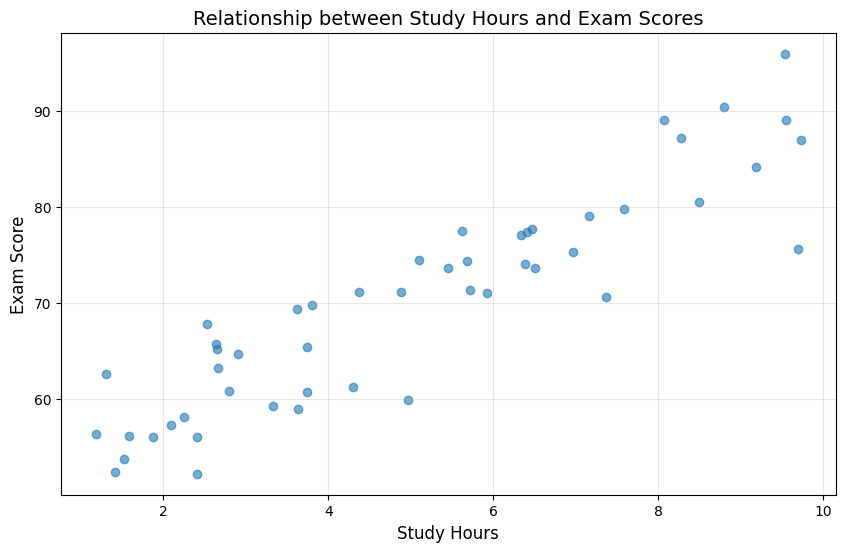

Observation: There appears to be a positive linear relationship.
As study hours increase, exam scores tend to increase.


In [ ]:
# Install statsmodels if not already installed
# !pip install statsmodels

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
# We will model how study hours affect exam scores
n_samples = 50
study_hours = np.random.uniform(1, 10, n_samples)  # Random hours between 1 and 10

# Create exam scores with a linear relationship plus some random noise
# True relationship: score = 50 + 4 * hours + noise
exam_scores = 50 + 4 * study_hours + np.random.normal(0, 5, n_samples)

# Create DataFrame
stats_data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Exam_Score': exam_scores
})

print("Sample Data (first 10 rows):")
print(stats_data.head(10))
print("\n" + "="*80 + "\n")

# Visualize the relationship
plt.figure(figsize=(10, 6))
# scatter() creates a scatter plot to visualize the relationship
plt.scatter(stats_data['Study_Hours'], stats_data['Exam_Score'], alpha=0.6)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Relationship between Study Hours and Exam Scores', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("Observation: There appears to be a positive linear relationship.")
print("As study hours increase, exam scores tend to increase.")

### 5.1 Simple Linear Regression with Statsmodels

In [ ]:
# Prepare the data for statsmodels
# X represents the independent variable (predictor)
X = stats_data['Study_Hours']
# y represents the dependent variable (outcome)
y = stats_data['Exam_Score']

# Add a constant term to X
# sm.add_constant() adds a column of 1s to the data
# This represents the intercept in the regression equation: y = intercept + slope*x
# Without this, the regression line would be forced to pass through origin (0,0)
X_with_const = sm.add_constant(X)

print("Features without constant:")
print(X.head())
print("\nFeatures with constant:")
print(X_with_const.head())
print("\n" + "="*80 + "\n")

# Create and fit the OLS (Ordinary Least Squares) model
# sm.OLS() creates an Ordinary Least Squares regression model
# OLS finds the line that minimizes the sum of squared errors
# Parameters:
#   y: dependent variable (what we want to predict)
#   X_with_const: independent variables including the constant
model_ols = sm.OLS(y, X_with_const)

# fit() estimates the model parameters (intercept and slope)
# It finds the best-fitting line through the data points
results = model_ols.fit()

# Display comprehensive statistical summary
# summary() provides detailed statistics about the model
print("\nRegression Results:")
print("="*80)
print(results.summary())
print("="*80)

Features without constant:
0    4.370861
1    9.556429
2    7.587945
3    6.387926
4    2.404168
Name: Study_Hours, dtype: float64

Features with constant:
   const  Study_Hours
0    1.0     4.370861
1    1.0     9.556429
2    1.0     7.587945
3    1.0     6.387926
4    1.0     2.404168



Regression Results:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     232.1
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           5.14e-20
Time:                        03:40:52   Log-Likelihood:                -146.55
No. Observations:                  50   AIC:                             297.1
Df Residuals:                      48   BIC:                             300.9
Df Model:                           1                    

### Understanding the Statsmodels Output

The summary output contains several important sections:

**Left Column (Model Information):**
- **Dep. Variable**: The dependent variable (y) we are predicting
- **Model**: The type of model (OLS for linear regression)
- **No. Observations**: Number of data points used
- **Df Residuals**: Degrees of freedom for residuals (n - k - 1)
- **Df Model**: Degrees of freedom for the model (number of predictors)

**Right Column (Model Quality):**
- **R-squared**: Proportion of variance explained (0 to 1, higher is better)
- **Adj. R-squared**: R-squared adjusted for number of predictors
- **F-statistic**: Tests if the model is better than predicting the mean
- **Prob (F-statistic)**: P-value for F-test (< 0.05 means model is significant)

**Coefficients Table:**
- **coef**: Estimated coefficient values (intercept and slopes)
- **std err**: Standard error of the coefficient estimates
- **t**: t-statistic for testing if coefficient is different from zero
- **P>|t|**: P-value (< 0.05 means the variable is significant)
- **[0.025 0.975]**: 95% confidence interval for the coefficient

In [ ]:
# Extract and interpret key statistics

print("Key Model Statistics:")
print("="*80)

# R-squared tells us how much variance in exam scores is explained by study hours
print(f"R-squared: {results.rsquared:.4f}")
print(f"This means {results.rsquared*100:.2f}% of variance in exam scores is explained by study hours.")
print()

# Coefficients tell us the relationship between variables
print("Coefficients:")
print(f"Intercept (const): {results.params['const']:.2f}")
print(f"This is the expected exam score when study hours = 0")
print()
print(f"Slope (Study_Hours): {results.params['Study_Hours']:.2f}")
print(f"For each additional study hour, exam score increases by {results.params['Study_Hours']:.2f} points")
print()

# P-values tell us if the relationships are statistically significant
print("P-values:")
print(f"Intercept p-value: {results.pvalues['const']:.4f}")
print(f"Study_Hours p-value: {results.pvalues['Study_Hours']:.4f}")
print("P-value < 0.05 indicates statistical significance")
print()

# Confidence intervals tell us the range of likely values for our coefficients
print("95% Confidence Intervals:")
print(results.conf_int())
print("We are 95% confident the true coefficient lies within this range")

Key Model Statistics:
R-squared: 0.8287
This means 82.87% of variance in exam scores is explained by study hours.

Coefficients:
Intercept (const): 50.61
This is the expected exam score when study hours = 0

Slope (Study_Hours): 3.88
For each additional study hour, exam score increases by 3.88 points

P-values:
Intercept p-value: 0.0000
Study_Hours p-value: 0.0000
P-value < 0.05 indicates statistical significance

95% Confidence Intervals:
                     0          1
const        47.725211  53.489942
Study_Hours   3.364396   4.387344
We are 95% confident the true coefficient lies within this range


### 5.2 Visualizing the Regression Line

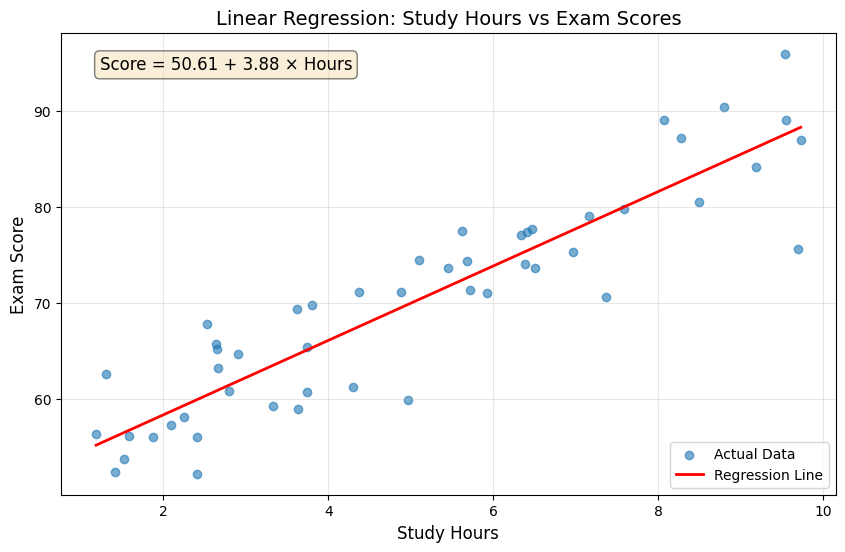

In [ ]:
# Visualize the regression line with the data points

plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(stats_data['Study_Hours'], stats_data['Exam_Score'],
            alpha=0.6, label='Actual Data')

# Generate predictions for the regression line
# results.predict() uses the fitted model to predict y values
# We use the same X values to create a smooth line
predictions = results.predict(X_with_const)

# Plot the regression line
# We sort the values to ensure the line is drawn correctly
sorted_indices = np.argsort(stats_data['Study_Hours'])
plt.plot(stats_data['Study_Hours'].iloc[sorted_indices],
         predictions.iloc[sorted_indices],
         color='red', linewidth=2, label='Regression Line')

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Linear Regression: Study Hours vs Exam Scores', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add the regression equation to the plot
equation = f'Score = {results.params["const"]:.2f} + {results.params["Study_Hours"]:.2f} × Hours'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

### 5.3 Multiple Linear Regression

In [ ]:
# Multiple regression: predicting exam scores using multiple features

# Add more features to make the model more realistic
np.random.seed(42)
stats_data['Previous_Score'] = np.random.uniform(60, 95, n_samples)
stats_data['Attendance_Percent'] = np.random.uniform(70, 100, n_samples)

# Create a more complex exam score
# Score depends on study hours, previous score, and attendance
stats_data['Exam_Score'] = (
    20 +
    3 * stats_data['Study_Hours'] +
    0.5 * stats_data['Previous_Score'] +
    0.2 * stats_data['Attendance_Percent'] +
    np.random.normal(0, 5, n_samples)
)

print("Enhanced Dataset (first 10 rows):")
print(stats_data.head(10))
print("\n" + "="*80 + "\n")

# Prepare features for multiple regression
X_multi = stats_data[['Study_Hours', 'Previous_Score', 'Attendance_Percent']]
y_multi = stats_data['Exam_Score']

# Add constant
X_multi_const = sm.add_constant(X_multi)

# Fit the model
model_multi = sm.OLS(y_multi, X_multi_const)
results_multi = model_multi.fit()

# Display results
print("Multiple Regression Results:")
print("="*80)
print(results_multi.summary())
print("="*80)
print()

# Interpret coefficients
print("Interpretation of Coefficients:")
print("="*80)
for var in X_multi.columns:
    coef = results_multi.params[var]
    pval = results_multi.pvalues[var]
    significance = "significant" if pval < 0.05 else "not significant"
    print(f"{var}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  P-value: {pval:.4f} ({significance})")
    print(f"  Holding other variables constant, a 1-unit increase in {var}")
    print(f"  is associated with a {coef:.4f} change in Exam Score")
    print()

Enhanced Dataset (first 10 rows):
   Study_Hours  Exam_Score  Previous_Score  Attendance_Percent
0     4.370861   89.919778       73.108904           99.087539
1     9.556429  112.462547       93.275001           93.253985
2     7.587945  105.669528       85.619788           98.184968
3     6.387926   89.071422       80.953047           96.844821
4     2.404168   76.431870       65.460652           87.936999
5     2.403951   81.258564       65.459808           97.656227
6     1.522753   77.505146       62.032926           72.654775
7     8.795585  104.129385       90.316165           75.879486
8     6.410035   89.978514       81.039025           71.356819
9     7.372653   97.952426       84.782540           79.759910


Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.865
Metho

### 5.4 Residual Analysis

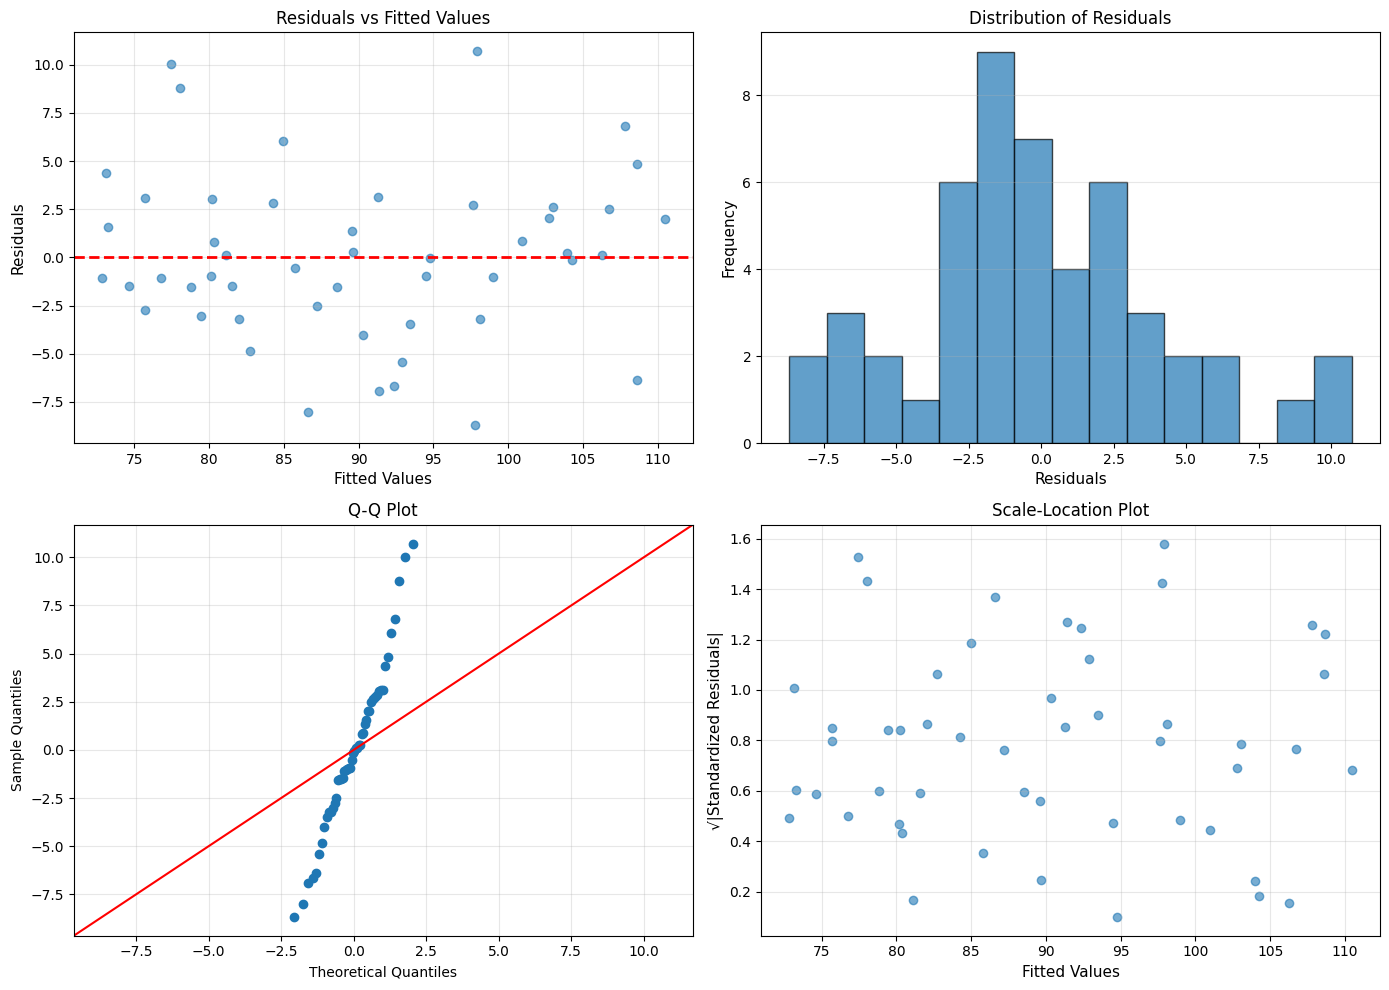


Residual Analysis Interpretation:
1. Residuals vs Fitted: Look for random scatter with no pattern
   - Pattern suggests non-linear relationship or heteroscedasticity

2. Histogram: Should be approximately bell-shaped and centered at 0
   - Skewness suggests violations of normality assumption

3. Q-Q Plot: Points should fall on the diagonal line
   - Deviations suggest non-normal residuals

4. Scale-Location: Should show horizontal trend
   - Funnel shape suggests heteroscedasticity (non-constant variance)


In [ ]:
# Residual analysis helps check if our model assumptions are met
# Residuals = Actual values - Predicted values

# Get residuals from the model
# results_multi.resid contains the differences between actual and predicted values
residuals = results_multi.resid

# Get fitted (predicted) values
fitted_values = results_multi.fittedvalues

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals vs Fitted Values
# This checks for homoscedasticity (constant variance)
# We want to see random scatter with no pattern
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Residuals vs Fitted Values', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Histogram of Residuals
# This checks if residuals are normally distributed
# We want to see a bell-shaped curve centered at 0
axes[0, 1].hist(residuals, bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuals', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Residuals', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Q-Q Plot
# This checks normality of residuals more formally
# Points should fall on the diagonal line if residuals are normal
sm.qqplot(residuals, line='45', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Scale-Location Plot
# This checks for homoscedasticity using standardized residuals
# We want to see a horizontal line with random scatter
standardized_resid = np.sqrt(np.abs(residuals / residuals.std()))
axes[1, 1].scatter(fitted_values, standardized_resid, alpha=0.6)
axes[1, 1].set_xlabel('Fitted Values', fontsize=11)
axes[1, 1].set_ylabel('√|Standardized Residuals|', fontsize=11)
axes[1, 1].set_title('Scale-Location Plot', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis Interpretation:")
print("="*80)
print("1. Residuals vs Fitted: Look for random scatter with no pattern")
print("   - Pattern suggests non-linear relationship or heteroscedasticity")
print()
print("2. Histogram: Should be approximately bell-shaped and centered at 0")
print("   - Skewness suggests violations of normality assumption")
print()
print("3. Q-Q Plot: Points should fall on the diagonal line")
print("   - Deviations suggest non-normal residuals")
print()
print("4. Scale-Location: Should show horizontal trend")
print("   - Funnel shape suggests heteroscedasticity (non-constant variance)")

### 5.5 Using Statsmodels for Categorical Data

In [ ]:
# Statsmodels can handle categorical variables using formulas
# This is similar to R's formula interface

import statsmodels.formula.api as smf

# Add a categorical variable to our dataset
study_methods = np.random.choice(['Self-Study', 'Group-Study', 'Tutoring'], n_samples)
stats_data['Study_Method'] = study_methods

print("Dataset with Categorical Variable:")
print(stats_data.head(10))
print("\n" + "="*80 + "\n")

# Using formula interface with categorical variable
# The formula uses R-style syntax: dependent ~ independent1 + independent2
# C(Study_Method) tells statsmodels to treat Study_Method as categorical
# Statsmodels automatically creates dummy variables
formula = 'Exam_Score ~ Study_Hours + Previous_Score + C(Study_Method)'

# smf.ols() is the formula version of sm.OLS()
# It automatically handles categorical variables and adds the constant
model_formula = smf.ols(formula=formula, data=stats_data)
results_formula = model_formula.fit()

print("Regression with Categorical Variable:")
print("="*80)
print(results_formula.summary())
print("="*80)
print()

print("Interpretation:")
print("="*80)
print("The C(Study_Method) coefficients represent differences from the reference category.")
print("Reference category is the first alphabetically (Group-Study).")
print()
print("For example, if C(Study_Method)[T.Self-Study] = -2.5:")
print("Students using Self-Study score 2.5 points lower than Group-Study students,")
print("holding all other variables constant.")

Dataset with Categorical Variable:
   Study_Hours  Exam_Score  Previous_Score  Attendance_Percent Study_Method
0     4.370861   89.919778       73.108904           99.087539   Self-Study
1     9.556429  112.462547       93.275001           93.253985   Self-Study
2     7.587945  105.669528       85.619788           98.184968     Tutoring
3     6.387926   89.071422       80.953047           96.844821  Group-Study
4     2.404168   76.431870       65.460652           87.936999   Self-Study
5     2.403951   81.258564       65.459808           97.656227     Tutoring
6     1.522753   77.505146       62.032926           72.654775     Tutoring
7     8.795585  104.129385       90.316165           75.879486     Tutoring
8     6.410035   89.978514       81.039025           71.356819  Group-Study
9     7.372653   97.952426       84.782540           79.759910     Tutoring


Regression with Categorical Variable:
                            OLS Regression Results                            
Dep. Varia

## Summary and Key Takeaways

### What We Learned:

**1. Statistics enables us to:**
- Describe and summarize data
- Make informed decisions
- Predict outcomes
- Handle uncertainty

**2. Data Types:**
- Numerical: Continuous (height, weight) and Discrete (count data)
- Categorical: Nominal (no order) and Ordinal (has order)

**3. Encoding Categorical Data:**
- Label Encoding: For ordinal data or when order matters
- One-Hot Encoding: For nominal data to avoid artificial ordering
- Ordinal Encoding: For ordinal data with explicit ordering

**4. Statsmodels Library:**
- Provides detailed statistical inference
- Gives p-values, confidence intervals, R-squared
- Useful for understanding relationships between variables
- Complements scikit-learn's prediction focus

**5. Best Practices:**
- Always check your data types before analysis
- Choose encoding method based on data characteristics
- Use statsmodels when you need statistical inference
- Use scikit-learn when you need predictive models
- Always perform residual analysis to validate model assumptions

### Next Steps:
- Practice with real-world datasets
- Explore time series analysis in statsmodels
- Learn about generalized linear models
- Study hypothesis testing in depth
- Combine statsmodels insights with machine learning predictions

## Assignment

## Practice Exercises

Try these exercises to reinforce your learning:

**Exercise 1: Data Type Identification**
- Create a dataset with at least 3 continuous, 3 discrete, 3 nominal, and 3 ordinal variables
- Load it into a DataFrame and verify the types

**Exercise 2: Encoding Practice**
- Take a dataset with both nominal and ordinal categorical variables
- Apply appropriate encoding techniques
- Build a simple machine learning model

**Exercise 3: Statsmodels Analysis**
- Find a dataset related to your field of interest
- Perform regression analysis
- Interpret the coefficients and p-values
- Check model assumptions using residual plots

**Exercise 4: Comparison**
- Build the same model using both statsmodels and scikit-learn
- Compare the outputs and understand the differences
- When would you use each library?